In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast

In [3]:
data = np.loadtxt("1550_paddles_stability_EDFA_20221027.csv",dtype=float,delimiter=";",skiprows=15,usecols=(0,3,4,5))

In [4]:
data

array([[0.0000e+00, 1.5405e-02, 8.7990e-04, 9.0030e-04],
       [1.0000e+00, 1.5386e-02, 8.7930e-04, 9.0028e-04],
       [2.0000e+00, 1.5383e-02, 8.8047e-04, 9.0025e-04],
       ...,
       [3.5965e+04, 1.5365e-02, 9.2947e-04, 8.4340e-04],
       [3.5966e+04, 1.5370e-02, 9.2885e-04, 8.4382e-04],
       [3.5967e+04, 1.5368e-02, 9.3010e-04, 8.4393e-04]])

In [5]:
samples = np.array([d[0] for d in data])
BS1_0 = np.array([d[1] for d in data])
BS0_0 = np.array([d[2] for d in data])
BS1_1 = np.array([d[3] for d in data])

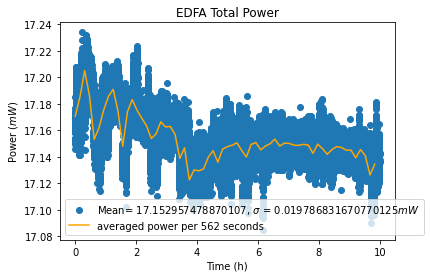

In [28]:
length = int(len(samples))
plt.scatter(samples[:length]/60/60,(BS0_0[:length]+BS1_0[:length]+BS1_1[:length])*1e3,label=r"Mean= {}, $\sigma$ = {}$mW$".format(np.average((BS0_0[:length]+BS1_0[:length]+BS1_1[:length])*1e3),np.std((BS0_0[:length]+BS1_0[:length]+BS1_1[:length])*1e3)))
total_power = (BS0_0+BS1_0+BS1_1)*1e3
average_power = [np.average(total_power[i*562:(i+1)*562]) for i in range(64)]
plt.plot(samples[:length][::562]/60/60,average_power,color='orange',label="averaged power per 562 seconds")
plt.xlabel("Time (h)")
plt.ylabel(r"Power ($mW$)")
plt.title("EDFA Total Power")
plt.legend()
plt.savefig("EDFA_power_20221027.png")

In [8]:
len(total_power)/562

64.0

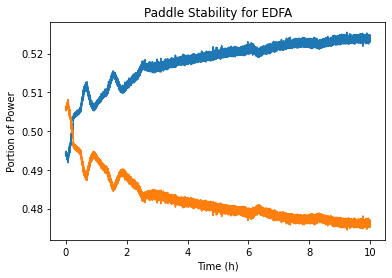

In [29]:
plt.plot(samples[:length]/60/60,BS0_0[:length]/(BS0_0[:length]+BS1_1[:length]))
plt.plot(samples[:length]/60/60,BS1_1[:length]/(BS0_0[:length]+BS1_1[:length]))
plt.ylabel("Portion of Power")
plt.xlabel("Time (h)")
plt.title("Paddle Stability for EDFA")
plt.savefig("EDFA_pol_20221027.png")

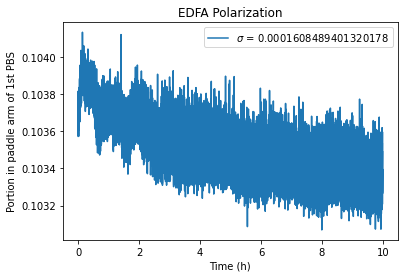

In [30]:
plt.plot(samples[:length]/60/60,(BS0_0[:length]+BS1_1[:length])/(BS0_0[:length]+BS1_0[:length]+BS1_1[:length]),label=r"$\sigma$ = {}".format(np.std((BS0_0[:length]+BS1_1[:length])/(BS0_0[:length]+BS1_0[:length]+BS1_1[:length]))))
plt.ylabel("Portion in paddle arm of 1st PBS")
plt.xlabel("Time (h)")
plt.title("EDFA Polarization")
plt.legend()
plt.savefig("EDFA_pol_stab_20221027.png")